# Fire Hazard Incidents Analytics Pipeline
## Human Factors vs Count

## Importing Required Libraries

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

from storedb import save_in_db, IMG_PATH

## Creating Spark Session and using all available cores

In [7]:
%%time
spark = SparkSession \
    .builder \
    .appName("532: Project") \
    .config("local[4]") \
    .getOrCreate()

CPU times: user 2.94 ms, sys: 3.52 ms, total: 6.46 ms
Wall time: 21 ms


## Loading EMS data

In [8]:
%%time
basic_module_df = spark.read.options(delimiter="^", header=True).csv("basicincident.txt")
ems_df = spark.read.options(delimiter="^", header=True).csv("ems.txt")

CPU times: user 3.1 ms, sys: 2.24 ms, total: 5.34 ms
Wall time: 381 ms


In [9]:
%%time
ems_df_combine = ems_df.select(F.explode(F.array(ems_df.HUM_FACT1, ems_df.HUM_FACT2, ems_df.HUM_FACT3, ems_df.HUM_FACT4, ems_df.HUM_FACT5, ems_df.HUM_FACT6, ems_df.HUM_FACT7, ems_df.HUM_FACT8)).alias("HumanFactors"))
ems_df_comb_na = ems_df_combine.na.drop(subset=("HumanFactors"))

ems_df_comb_na = ems_df_comb_na.filter(ems_df_comb_na.HumanFactors != "N")
ems_df_comb_na = ems_df_comb_na.groupBy("HumanFactors").count()


CPU times: user 6.14 ms, sys: 3.38 ms, total: 9.51 ms
Wall time: 65 ms


In [10]:
%%time
p_ems_df = ems_df_comb_na.toPandas()

CPU times: user 269 ms, sys: 112 ms, total: 381 ms
Wall time: 863 ms


CPU times: user 64.6 ms, sys: 7.6 ms, total: 72.2 ms
Wall time: 114 ms


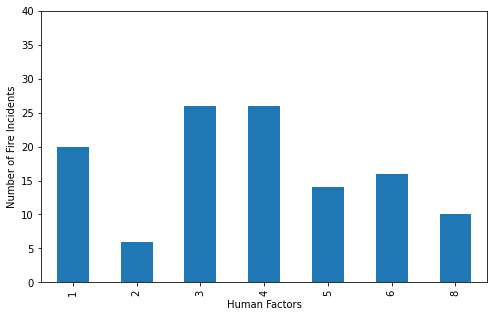

In [16]:
%%time
p_ems_df = ems_df_comb_na.toPandas()

ptest = p_ems_df.sort_values(by="HumanFactors").plot(x="HumanFactors", y="count", xlabel="Human Factors", ylabel = "Number of Fire Incidents", legend = False, kind="bar", ylim=(0,40),figsize=(8,5))

fig_name = "human_factors_number.png"
fig1 = ptest.get_figure()
fig1.savefig(f"{IMG_PATH}{fig_name}")

# saving to db
save_in_db(fig_name, "relative_humid_fires")
